In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd
import soundfile as sf

## 1. Importar os sinais

Nós precisamos importar uma resposta ao impulso $h(t)$ e o sinal anecoico, $x(t)$, será composto por um seno ou uma soma de senos.

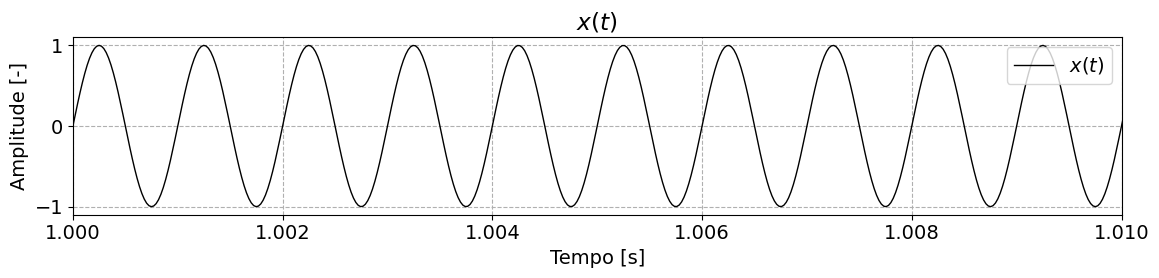

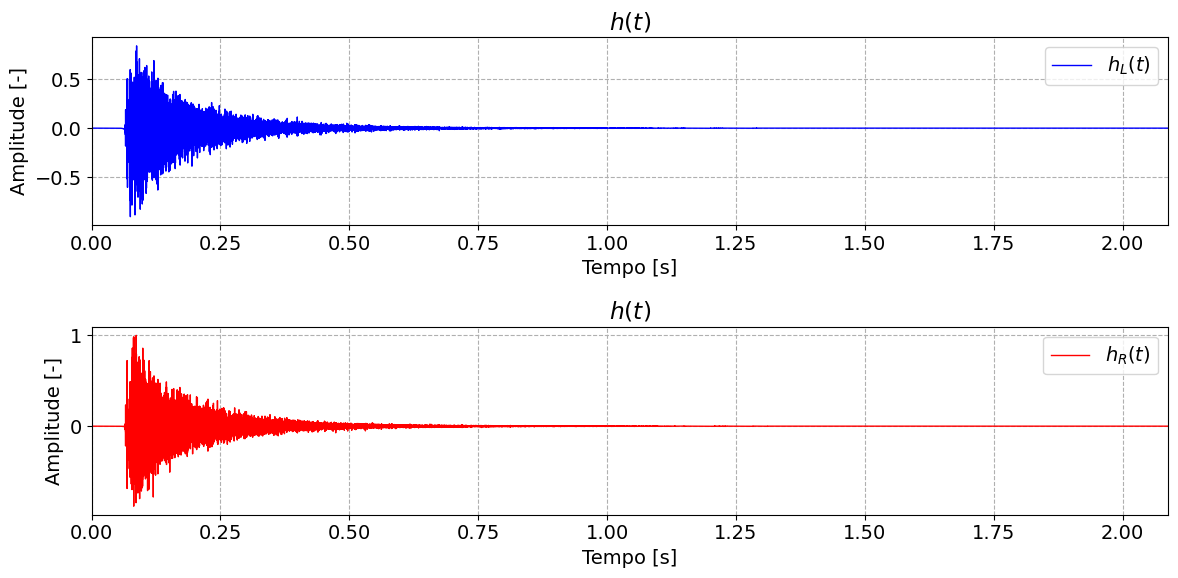

In [10]:
##### x(t) anechoic signal #################
fs = 44100
time_xt = np.arange(0, 3, 1/fs)
xt = np.sin(2*np.pi*1000*time_xt)
##### h(t) anechoic signalimpulse response #################
ht, fs = sf.read('ht.wav')
time_ht = np.linspace(0, (len(ht)-1)/fs, len(ht))

plt.figure(figsize=(12,3))
plt.title(r'$x(t)$')
plt.plot(time_xt, xt, '-k', linewidth = 1, label = r'$x(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((1, 1.01))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title(r'$h(t)$')
plt.plot(time_ht, ht[:,0], '-b', linewidth = 1, label = r'$h_L(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_ht[-1]))

plt.subplot(2,1,2)
plt.title(r'$h(t)$')
plt.plot(time_ht, ht[:,1], '-r', linewidth = 1, label = r'$h_R(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, time_ht[-1]))
plt.tight_layout()
plt.show()

## 2. Vamos ouvir os sinais

Para $x(t)$ note como o sinal não possui qualquer característica de reverberação.

In [11]:
# x(t)
ipd.Audio(xt, rate=fs) # load a NumPy array

Agora as respostas ao impulso

In [4]:
# h(t)
ipd.Audio([ht[:,0], ht[:,1]], rate=fs) # load a NumPy array

## 3. Vamos operar as convoluções e plotar o resultado.

Vamos precisar operar 2 convoluções - uma para o canal esquerdo e outro para o direito

In [12]:
# Canal esquerdo
yLt = np.convolve(xt, ht[:,0])
# Canal direito
yRt = np.convolve(xt, ht[:,1])#Se você substituir o 1 por 0 aqui, vai convoluir sem a impressão de espacialidade. Faça o teste.

time_yt = np.linspace(0, (len(yRt)-1)/fs, len(yRt))
time_lim = (1, 1.003)

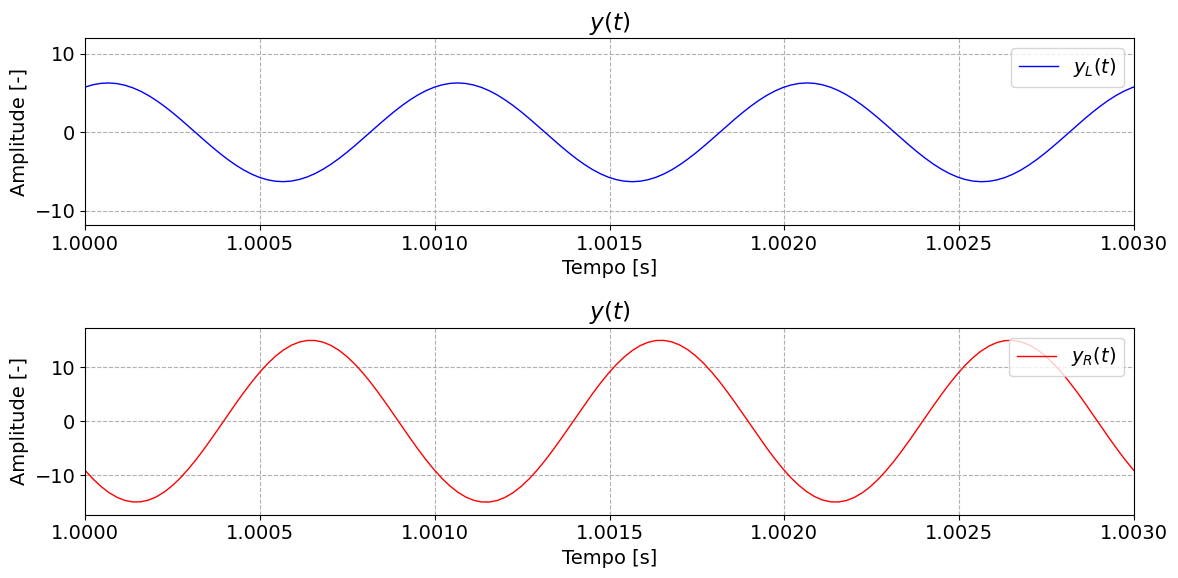

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title(r'$y(t)$')
plt.plot(time_yt, yLt, '-b', linewidth = 1, label = r'$y_L(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim(time_lim)

plt.subplot(2,1,2)
plt.title(r'$y(t)$')
plt.plot(time_yt, yRt, '-r', linewidth = 1, label = r'$y_R(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim(time_lim)
plt.tight_layout()
plt.show()

## 4. Ouvindo o resultado

Note a reverberação e alguma espacialidade.

In [14]:
# y(t)
ipd.Audio([yLt, yRt], rate=fs) # load a NumPy array